In [1]:
%pylab nbagg
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys

# Set working directory (adjust if needed)
#os.chdir("/Users/giovanni/Documents/GitHub/fufo/notebook/Psychedelic_proj/2025_LisaLuan/notebooks")

sys.path.append(os.path.abspath("../src"))
from functions_figs import *

file_path = '../data/hd-EEG/5MOIs_results_df.csv'

Populating the interactive namespace from numpy and matplotlib


In [2]:
#path_out='/Users/giovanni/Documents/GitHub/fufo/data/Interim/Momi/Article/Figures/py/hdEEG/'

In [2]:
# # Load dataset
df = pd.read_csv(file_path)

# Define a mapping from M_i to actual metric names
metric_names = {
    "M_13": "Salience",
    "M_14": "Peak Synchrony",
    "M_76": "Entrainment",
    "M_29": "Fluidity",
    "M_119": "Complexity"
}

# Apply the mapping to replace metric codes with names
df["Pre_Metric"] = df["Pre_Metric"].map(metric_names)
df["Post_Metric"] = df["Post_Metric"].map(metric_names)

# Filter dataset for the selected pre/post metric pair and radius = 100
df_filtered = df[(df["Pre_Metric"] == "Entrainment") & 
                 (df["Post_Metric"] == "Entrainment") & 
                 (df["Radius"] == 100)]

# Find the most anticorrelated session and subject (minimum correlation)
most_anticorrelated = df_filtered.loc[df_filtered["Correlation"].idxmin()]

# Display results
print(f"Most anticorrelated subject: {most_anticorrelated['Patient']}")
print(f"Most anticorrelated session: {most_anticorrelated['Session']}")
print(f"Correlation value: {most_anticorrelated['Correlation']:.3f}")

Most anticorrelated subject: P25
Most anticorrelated session: S1
Correlation value: -0.525


In [3]:
df_filtered

,Patient,Session,Radius,Pre_Metric,Post_Metric,Correlation,Significance,p-values,Network,ROI Name,ROI Label,Clustering Coefficient,Degree,Betweenness Centrality
268,P1,S1,100,Entrainment,Entrainment,0.510167,1,0.009901,SalVentAttn,7Networks_LH_SalVentAttn_FrOperIns_4,50,0.001979,19777,0.003281
543,P1,S2,100,Entrainment,Entrainment,0.260264,0,0.227723,SalVentAttn,7Networks_LH_SomMot_5,19,0.000955,7994,0.008632
818,P1,S3,100,Entrainment,Entrainment,0.047619,0,0.534653,SalVentAttn,7Networks_LH_SomMot_5,19,0.000955,7994,0.008632
1093,P1,S4,100,Entrainment,Entrainment,0.120436,0,0.316832,SalVentAttn,7Networks_LH_SomMot_3,17,0.001135,7249,0.006102
1368,P1,S5,100,Entrainment,Entrainment,0.401070,1,0.039604,SalVentAttn,7Networks_LH_SomMot_2,16,0.001729,24179,0.004097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80293,P34,S8,100,Entrainment,Entrainment,0.085386,0,0.475248,SalVentAttn,7Networks_LH_SalVentAttn_FrOperIns_3,49,0.001062,3580,0.003268
80568,P34,S9,100,Entrainment,Entrainment,-0.029744,0,0.613861,DorsAttn,7Networks_LH_SomMot_5,19,0.000955,7994,0.008632
80843,P34,S10,100,Entrainment,Entrainment,-0.027367,0,0.831683,SomMot,7Networks_LH_SalVentAttn_FrOperIns_2,48,0.000998,5562,0.003307
81118,P34,S11,100,Entrainment,Entrainment,0.275315,0,0.178218,Default,7Networks_LH_Default_PFC_5,87,0.002296,25379,0.004247


# Panel B - Effect of Radius on explained variance

/Users/giovanni/anaconda2/envs/p36workshop/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Correlation
No. Observations: 374     Method:             REML       
No. Groups:       34      Scale:              0.0019     
Min. group size:  11      Log-Likelihood:     568.4007   
Max. group size:  11      Converged:          Yes        
Mean group size:  11.0                                   
----------------------------------------------------------
             Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept    0.041     0.015  2.813  0.005   0.013   0.070
Radius       0.001     0.000  9.712  0.000   0.001   0.001
Group Var    0.007     0.041                              



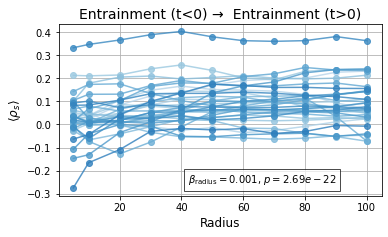

In [5]:
prem="Entrainment"
posm="Entrainment"
result, df_avg = print_lmem(df,prem, posm)
plot_subject_lines(df_avg,prem, posm, result)


/Users/giovanni/anaconda2/envs/p36workshop/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Correlation
No. Observations: 374     Method:             REML       
No. Groups:       34      Scale:              0.0042     
Min. group size:  11      Log-Likelihood:     438.7658   
Max. group size:  11      Converged:          Yes        
Mean group size:  11.0                                   
----------------------------------------------------------
            Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   0.017     0.013   1.329  0.184  -0.008   0.042
Radius      0.001     0.000  12.229  0.000   0.001   0.002
Group Var   0.004     0.018                               



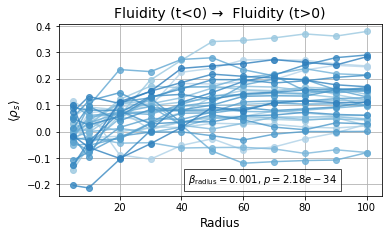

In [6]:
prem="Fluidity"
posm="Fluidity"
result, df_avg = print_lmem(df,prem, posm)
plot_subject_lines(df_avg,prem, posm, result)


/Users/giovanni/anaconda2/envs/p36workshop/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Correlation
No. Observations: 374     Method:             REML       
No. Groups:       34      Scale:              0.0046     
Min. group size:  11      Log-Likelihood:     421.1698   
Max. group size:  11      Converged:          Yes        
Mean group size:  11.0                                   
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept     -0.012    0.014  -0.882 0.378 -0.039  0.015
Radius        -0.001    0.000 -11.678 0.000 -0.002 -0.001
Group Var      0.005    0.020                            



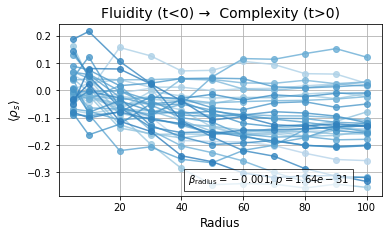

In [7]:
prem="Fluidity"
posm="Complexity"
result, df_avg = print_lmem(df,prem, posm)
plot_subject_lines(df_avg,prem, posm, result)


/Users/giovanni/anaconda2/envs/p36workshop/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Correlation
No. Observations: 374     Method:             REML       
No. Groups:       34      Scale:              0.0016     
Min. group size:  11      Log-Likelihood:     589.1400   
Max. group size:  11      Converged:          Yes        
Mean group size:  11.0                                   
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept     -0.050    0.017  -2.996 0.003 -0.083 -0.017
Radius        -0.001    0.000 -11.051 0.000 -0.001 -0.001
Group Var      0.009    0.059                            



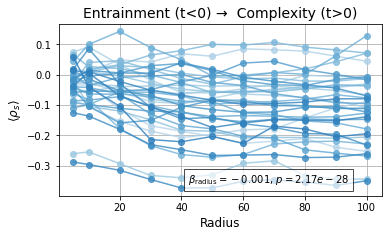

In [8]:
prem="Entrainment"
posm="Complexity"
result, df_avg = print_lmem(df,prem, posm)
plot_subject_lines(df_avg,prem, posm, result)


/Users/giovanni/anaconda2/envs/p36workshop/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Correlation
No. Observations: 374     Method:             REML       
No. Groups:       34      Scale:              0.0022     
Min. group size:  11      Log-Likelihood:     545.9701   
Max. group size:  11      Converged:          Yes        
Mean group size:  11.0                                   
----------------------------------------------------------
           Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept  -0.047     0.015  -3.173  0.002  -0.076  -0.018
Radius     -0.001     0.000  -7.241  0.000  -0.001  -0.000
Group Var   0.007     0.038                               



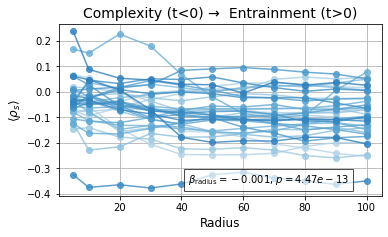

In [9]:
prem="Complexity"
posm="Entrainment"
result, df_avg = print_lmem(df,prem, posm)
plot_subject_lines(df_avg,prem, posm, result)


# Panel D

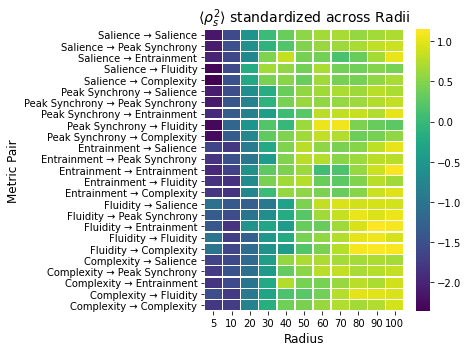

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(file_path)

# Define a mapping from M_i to actual metric names
metric_names = {
    "M_13": "Salience",
    "M_14": "Peak Synchrony",
    "M_76": "Entrainment",
    "M_29": "Fluidity",
    "M_119": "Complexity"
}

# Apply the mapping to replace metric codes with names
df["Pre_Metric"] = df["Pre_Metric"].map(metric_names)
df["Post_Metric"] = df["Post_Metric"].map(metric_names)

# Define metric order
ordered_metrics = ["Salience", "Peak Synchrony", "Entrainment", "Fluidity", "Complexity"]

# Ensure ordered categories
df["Pre_Metric"] = pd.Categorical(df["Pre_Metric"], categories=ordered_metrics, ordered=True)
df["Post_Metric"] = pd.Categorical(df["Post_Metric"], categories=ordered_metrics, ordered=True)

# Compute explained variance (rho²) instead of correlation (rho)
df["Explained_Variance"] = df["Correlation"] ** 2

# Compute mean explained variance
df_summary = df.groupby(["Pre_Metric", "Post_Metric", "Radius"])["Explained_Variance"].mean().reset_index()

# Create Metric Pair column
df_summary["Metric_Pair"] = df_summary["Pre_Metric"].astype(str) + " → " + df_summary["Post_Metric"].astype(str)

# Pivot table for heatmap format
heatmap_data = df_summary.pivot(index="Metric_Pair", columns="Radius", values="Explained_Variance")

# Ensure correct order
heatmap_data = heatmap_data.reindex(index=[f"{pre} → {post}" for pre in ordered_metrics for post in ordered_metrics])

# Z-score standardization across each row (i.e., across radii)
heatmap_data_standardized = heatmap_data.sub(heatmap_data.mean(axis=1), axis=0)
heatmap_data_standardized = heatmap_data_standardized.div(heatmap_data.std(axis=1), axis=0)

# Plot the heatmap (without annotations)
plt.figure(figsize=(6.5, 5))
sns.heatmap(heatmap_data_standardized, cmap="viridis", linewidths=0.5, cbar_kws={'label': r''})#$\langle \rho_s^2 \rangle$

# Labels and title
plt.xlabel("Radius", fontsize=12)
plt.ylabel("Metric Pair", fontsize=12)
plt.title(r"$\langle\rho_s^2 \rangle $ standardized across Radii", fontsize=14)

plt.tight_layout()
#plt.savefig(path_out+'EEG_Explained_Variance.png',dpi=300)

plt.show()


In [11]:
heatmap_data

Radius,5,10,20,30,40,50,60,70,80,90,100
Metric_Pair,,,,,,,,,,,
Salience → Salience,0.081151,0.088412,0.101231,0.108316,0.112324,0.114803,0.116188,0.116626,0.115212,0.116305,0.116900
Salience → Peak Synchrony,0.067297,0.074293,0.084875,0.090836,0.094287,0.097596,0.099041,0.099433,0.100089,0.101283,0.102146
Salience → Entrainment,0.045971,0.047611,0.051145,0.055901,0.057360,0.055653,0.055602,0.054608,0.055341,0.056713,0.058126
Salience → Fluidity,0.050688,0.052720,0.056568,0.058972,0.058693,0.058244,0.059052,0.058229,0.058186,0.058491,0.058292
Salience → Complexity,0.051715,0.055269,0.060253,0.063095,0.063436,0.062721,0.063930,0.062993,0.062981,0.063603,0.064120
Peak Synchrony → Salience,0.074590,0.080798,0.090892,0.096292,0.102124,0.104702,0.105621,0.106266,0.105463,0.106943,0.106280
Peak Synchrony → Peak Synchrony,0.065639,0.071971,0.077611,0.084052,0.088678,0.090351,0.090020,0.090221,0.090482,0.091529,0.092364
Peak Synchrony → Entrainment,0.044275,0.046673,0.048481,0.050222,0.051882,0.052609,0.054711,0.054841,0.054953,0.054491,0.055624
Peak Synchrony → Fluidity,0.051066,0.053062,0.054267,0.055637,0.055255,0.056413,0.057211,0.057253,0.056117,0.055891,0.055757
